In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sylvester import *
from scipy import linalg

M1 = np.array([[8, 1, 6], [3, 5, 7], [4, 9, 2]])
M2 = np.array([[16, 4, 1], [9, 3, 1], [4, 2, 1]])
M3 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 0]])

### Sylvester equations

$AX + XB = C$

In [2]:
# Set Matrices
A = [M1, np.eye(3)]
B = [np.eye(3), M2]
C = M3

# Run Algorithm
X, j, epsilon = gigmres(A, B, C)

[[ 0.07487187  0.08991343 -0.43292   ]
 [ 0.00807164  0.48144177 -0.21603391]
 [ 0.01957708  0.18264383  1.15792144]]
[[ 0.07487187  0.08991343 -0.43292   ]
 [ 0.00807164  0.48144177 -0.21603391]
 [ 0.01957708  0.18264383  1.15792144]]


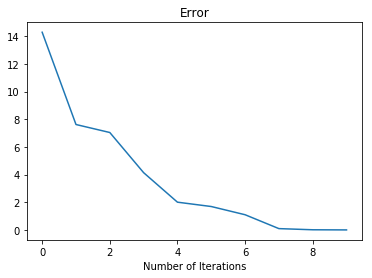

In [3]:
# Print Solution 
print(X)
print(linalg.solve_sylvester(M1, M2, C))

# Plot Results
plt.plot(epsilon)
plt.title("Error")
plt.xlabel("Number of Iterations")
plt.show()

### Discrete Lyapunov equations

$AXA^{T} - X = -C$

In [4]:
# Set Matrices
M4 = np.dot((M3 - np.eye(3)),linalg.inv(M3 + np.eye(3)))
M5 = 2.0 * np.dot(np.dot(linalg.inv(M3.T + np.eye(3)), M2), linalg.inv(M3 + np.eye(3)))

A = [M4.T, np.eye(3)]
B = [np.eye(3), M4]
C = -M5

# Run Algorithm
X, j, epsilon = gigmres(A, B, C)

[[ 2.99664394 -2.20522587  1.72522906]
 [-1.94206797  1.30485564 -0.94827403]
 [ 2.59365012 -1.36932666  0.29330918]]
[[ 2.99664394 -2.20522587  1.72522906]
 [-1.94206797  1.30485564 -0.94827403]
 [ 2.59365012 -1.36932666  0.29330918]]


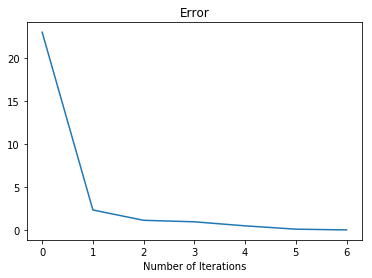

In [5]:
# Print Solution
print(X)
print(linalg.solve_discrete_lyapunov(M3.T, M2))

# Plot Results
plt.plot(epsilon)
plt.title("Error")
plt.xlabel("Number of Iterations")
plt.show()

### Continuous Lyapunov equations

$AX + XA^{T} = -C$

In [6]:
# Set Matrices
A = [M3, np.eye(3)]
B = [np.eye(3), M3.T]
C = -1*M2

# Run Algorithm
X, j, epsilon = gigmres(A, B, C)

[[ 6.19063181 -6.16557734 -0.22440087]
 [-6.44008715  4.26252723  0.44880174]
 [-0.83224401  0.35076253  1.43899782]]
[[ 6.19063181 -6.16557734 -0.22440087]
 [-6.44008715  4.26252723  0.44880174]
 [-0.83224401  0.35076253  1.43899782]]


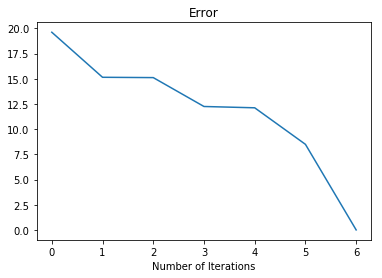

In [7]:
# Print Solution
print(X)
print(linalg.solve_lyapunov(M3, -M2))

# Plot Results
plt.plot(epsilon)
plt.title("Error")
plt.xlabel("Number of Iterations")
plt.show()